In [2]:
!pip install ktrain

     |████████████████████████████████| 25.2 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 981 kB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 53.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 43.9 MB/s eta 0:00:01


  Created wheel for ktrain: filename=ktrain-0.13.2-py3-none-any.whl size=25239773 sha256=48e6505b5aded548cfec8ade17336277459813072bcf9219efe1b7a40aea9ac4
  Stored in directory: /root/.cache/pip/wheels/42/3a/2f/92ae6871ce711e1ae3523d429c4219f6ff344b219e164f6575
  Created wheel for keras-bert: filename=keras_bert-0.81.0-py3-none-any.whl size=37912 sha256=176853563de3670d3a44562762a04ae8792f5d87686dde7a2b2f383e17460ff8
  Stored in directory: /root/.cache/pip/wheels/ee/d9/2a/75b40df359ab9096f06e55804ca64fbb2592a6ff77345c5fa7
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993191 sha256=75e1c609c9f2a8f677712cbe3226371dedf53d0a69eaeb74bc4d6cac30c046c6
  Stored in directory: /root/.cache/pip/wheels/53/88/5d/b239dc55d773b01fdd2059606b1a8f4b64548848b8f6e381c3
  Created wheel for seqeval: filename=seqeval-0.0.12-py3-none-any.whl size=7423 sha256=cef0809e537d1e158bf9db7e36da8792fdbe6afd897e39c80027ae5212e78e2c
  Stored in directory: /root/.cache/pip/wheels/1f/1b/a6

  Created wheel for keras-position-wise-feed-forward: filename=keras_position_wise_feed_forward-0.6.0-py3-none-any.whl size=5623 sha256=7f4db0a1ceb91f301ca255fd1074a93491e77036562111dd49064370c9335484
  Stored in directory: /root/.cache/pip/wheels/75/25/c7/5a4c25eabcddaa3f108a9fe5ad8f0ad94e6566f25c391ea4f6
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.7.0-py3-none-any.whl size=4674 sha256=648f4f81d7ff905e52cd68b2adac9bf7f83fe6e5180499b4d1c81a05b5418e80
  Stored in directory: /root/.cache/pip/wheels/f3/16/a7/275994b075e49c199afced51712534a142429c90cd92a19241
  Created wheel for keras-self-attention: filename=keras_self_attention-0.41.0-py3-none-any.whl size=17288 sha256=ee69fb0c0bc9e927cf3cd554eab095fda65d50737d1773893c84a12e36c0f021
  Stored in directory: /root/.cache/pip/wheels/dc/71/4f/03604d0ee00490bf16606901a5977cd2bc3e4a087aff710e4f
Successfully built ktrain keras-bert langdetect seqeval syntok keras-transformer keras-pos-embd keras-multi-head keras-layer-normali

In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split
import csv

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv


In [4]:
data = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv')

In [5]:
def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])
    
def tokenize(text):
    return word_tokenize(text)
    
def to_lowercase(text):
    return ''.join([char.lower() for char in text])
    
def stemming(text):
    snowball_stemmer = SnowballStemmer('english')
    return ' '.join([snowball_stemmer.stem(word) for word in tokenize(text)])

def preprocess_text(dataframe_column):
    dataframe_column = dataframe_column.map(lambda comment : remove_punctuation(comment))
    dataframe_column = dataframe_column.map(lambda comment : to_lowercase(comment))
    dataframe_column = dataframe_column.map(lambda comment : stemming(comment))
    return dataframe_column

In [6]:
data['comment_text'] = preprocess_text(data['comment_text'])

In [7]:
data['comment_text']

0         explan whi the edit made under my usernam hard...
1         daww he match this background colour im seem s...
2         hey man im realli not tri to edit war it just ...
3         more i cant make ani real suggest on improv i ...
4         you sir are my hero ani chanc you rememb what ...
                                ...                        
223544    jerom i see you never got around to this… i ’ ...
223545    lucki bastard httpwikimediafoundationorgwikipr...
223546    shame on you all you want to speak about gay a...
223547    mel gibson is a nazi bitch who make shitti mov...
223548    unicorn lair discoveri suppos a unicorn lair h...
Name: comment_text, Length: 223549, dtype: object

In [8]:
data['toxic']

0         0
1         0
2         0
3         0
4         0
         ..
223544    0
223545    0
223546    0
223547    1
223548    0
Name: toxic, Length: 223549, dtype: int64

We check percentage of values for each column including the ones having null entries.

In [10]:
data['toxic'].value_counts(dropna=False, normalize=True)

0    0
1    0
Name: toxic, dtype: int64

We check the null entries.

In [11]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

No null entry!

Getting stats for columns

In [12]:
data['comment_text'].describe()

count                                                223549
unique                                               222314
top       pleas stop if you continu to vandal page you w...
freq                                                     24
Name: comment_text, dtype: object

We observe that some comments are same.

In [13]:
data[data['comment_text'].duplicated()]['toxic']

7197      0
7456      0
8610      1
8947      1
10405     0
         ..
223100    0
223259    0
223410    0
223415    0
223523    0
Name: toxic, Length: 1235, dtype: int64

We check the length of each comment. To do so, we use len() method offered by pandas.

In [14]:
data['comment_length'] = list(data["comment_text"].str.len())
data['comment_length'].describe()

count    223549.000000
mean        338.520199
std         517.404517
min           0.000000
25%          79.000000
50%         175.000000
75%         373.000000
max        5075.000000
Name: comment_length, dtype: float64

Mean length of comments is 338.

It would be good to have an idea of Most Common Words using a Wordcloud.

Collecting all the comments in a string to analyze.

In [15]:
wordcloud_text = ''.join([comment for comment in data['comment_text'][1:1000] if pd.notna(comment)])

In [ ]:
wordcloud_text

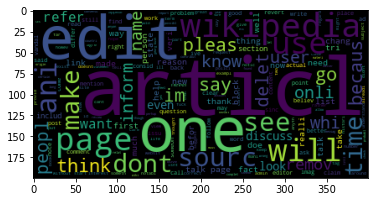

In [16]:
wordcloud = WordCloud().generate(wordcloud_text)
plt.imshow(wordcloud)
plt.show()

Now we prepare train and test data and keep test size to 33 percent.

In [17]:
'''
x_train = df["comment_text"].head(round((2/3) * len(df["comment_text"])))
y_train=  df["toxic"].head(round((2/3) * len(df["comment_text"]))).values.tolist()
x_test = df["comment_text"].tail(round((1/3) * len(df["comment_text"])))
y_test = df["toxic"].head(round((1/3) * len(df["comment_text"]))).values.tolist()
'''

'\nx_train = df["comment_text"].head(round((2/3) * len(df["comment_text"])))\ny_train=  df["toxic"].head(round((2/3) * len(df["comment_text"]))).values.tolist()\nx_test = df["comment_text"].tail(round((1/3) * len(df["comment_text"])))\ny_test = df["toxic"].head(round((1/3) * len(df["comment_text"]))).values.tolist()\n'

In [18]:
x_train = data["comment_text"].head(2000).values.tolist()
y_train=  data["toxic"].head(2000).values.tolist()
x_test = data["comment_text"].tail(660).values.tolist()
y_test = data["toxic"].tail(660).values.tolist()

In [19]:
len(x_train), len(y_train), len(x_test), len(y_test)

(2000, 2000, 660, 660)

Our target feature toxic is binary in nature i.e. 1 and 0. A comment is labelled and classified either toxic or not.

We have used ktrain library to implement BERT (Bidirectional Encoder Representations from Transformers). BERT is a bidirectional training technique as discussed in the paper https://arxiv.org/abs/1810.04805

In [20]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=['0','1'],
                                                                       preprocess_mode='bert',
                                                                       maxlen=338)

task: text classification
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


preprocessing test...
language: en


We have used maxlen as 338, the mean length of each comment.

In [21]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=3)

Is Multi-Label? False
maxlen is 338
done.


In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 338)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 338)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 338, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 338, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [23]:
result = learner.fit_onecycle(2e-5, 2)



begin training using onecycle policy with max lr of 2e-05...
Train on 2000 samples
Epoch 1/2
2000/2000 [==============================] - 331s 166ms/sample - loss: 0.2631 - accuracy: 0.8940
Epoch 2/2
2000/2000 [==============================] - 308s 154ms/sample - loss: 0.1068 - accuracy: 0.9625


In [24]:
validate = learner.validate(val_data=(x_test, y_test), class_names=['0', '1'])

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       598
           1       0.52      0.94      0.67        62

    accuracy                           0.91       660
   macro avg       0.76      0.92      0.81       660
weighted avg       0.95      0.91      0.92       660



In [25]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [26]:
predictor.get_classes()

['0', '1']

In [37]:
prediction = predictor.predict(data['comment_text'].tail(660).tolist())

In [38]:
prediction

['0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0'

In [39]:
len(prediction)

660

Getting index backwords for 33 test data

In [66]:
submission_index = list(data.index[:-661:-1])

In [67]:
submission_index.reverse()

In [69]:
submission_index[0], submission_index[-1]

(222889, 223548)

In [73]:
len(submission_index), len(prediction)

(660, 660)

In [75]:
submission_dataframe = pd.DataFrame({'id': submission_index, 'toxic': prediction})

In [80]:
'''
submission_dataframe.to_csv('submission.csv', index=False)
'''

"\nsubmission_dataframe.to_csv('submission.csv', index=False)\n"

In [79]:
with open('submission.csv', mode='a+') as submission_csv:
    submission_writer = csv.writer(submission_csv, delimiter=',')
    submission_writer.writerow(['id', 'toxic'])
    for index, row in submission_dataframe.iterrows():
        submission_writer.writerow([row['id'], row['toxic']])